In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torch.utils.data.dataset import random_split
import torch.utils.data as data
import seaborn as sns

# SciKit
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Python
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import time

### Load dataset & 看資料長啥樣

In [2]:
# load dataset
input_data = pd.read_csv('station/466920taipei.csv', usecols = ["觀測時間(hour)", "測站氣壓(hPa)", "海平面氣壓(hPa)", "氣溫(℃)", "露點溫度(℃)", "相對溼度(%)", "風速(m/s)", "降水量(mm)", "降水時數(hr)", "日照時數(hr)", "天全空日射量(MJ/㎡)"])

# fill NaN with 0
input_data = input_data.fillna(0)

input_data['觀測時間(hour)'] = pd.to_datetime(input_data['觀測時間(hour)'])
input_data.set_index('觀測時間(hour)')

input_data.head()

,觀測時間(hour),測站氣壓(hPa),海平面氣壓(hPa),氣溫(℃),露點溫度(℃),相對溼度(%),風速(m/s),降水量(mm),降水時數(hr),日照時數(hr),天全空日射量(MJ/㎡)
0,2010-01-01 00:00:00,1021.8,1022.6,13.7,8.2,69.0,3.6,0.0,0.0,0.0,0.0
1,2010-01-01 01:00:00,1021.4,1022.2,13.8,8.3,69.0,4.0,0.0,0.0,0.0,0.0
2,2010-01-01 02:00:00,1020.4,1021.2,13.9,8.4,69.0,3.8,0.0,0.0,0.0,0.0
3,2010-01-01 03:00:00,1019.9,1020.7,13.9,8.4,69.0,4.1,0.0,0.0,0.0,0.0
4,2010-01-01 04:00:00,1019.6,1020.4,14.0,8.5,69.0,3.3,0.0,0.0,0.0,0.0


### 看一年的資料長啥樣

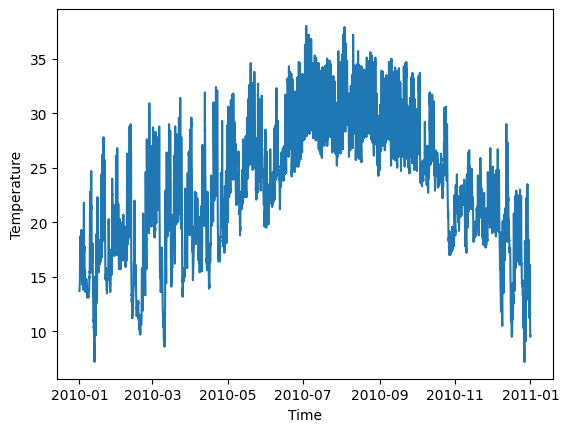

In [3]:
# 選擇 2010 年的資料
input_data_2010 = input_data[input_data['觀測時間(hour)'].dt.year == 2010]

plt.plot(input_data_2010['觀測時間(hour)'], input_data_2010['氣溫(℃)'])
plt.xlabel('Time')
plt.ylabel('Temperature')
plt.show()

# Feature Selection

### Random Forest

測站氣壓(hPa): 0.07897032971016059
海平面氣壓(hPa): 0.01382238706829938
露點溫度(℃): 0.6993863326089023
相對溼度(%): 0.19247128908302413
風速(m/s): 0.0029372170829707546
降水量(mm): 0.0007606436264522294
降水時數(hr): 0.0008680040651379519
日照時數(hr): 0.010101422193023558
天全空日射量(MJ/㎡): 0.0006823745620292968
Top 5 features: Index(['露點溫度(℃)', '相對溼度(%)', '測站氣壓(hPa)', '海平面氣壓(hPa)', '日照時數(hr)'], dtype='object')


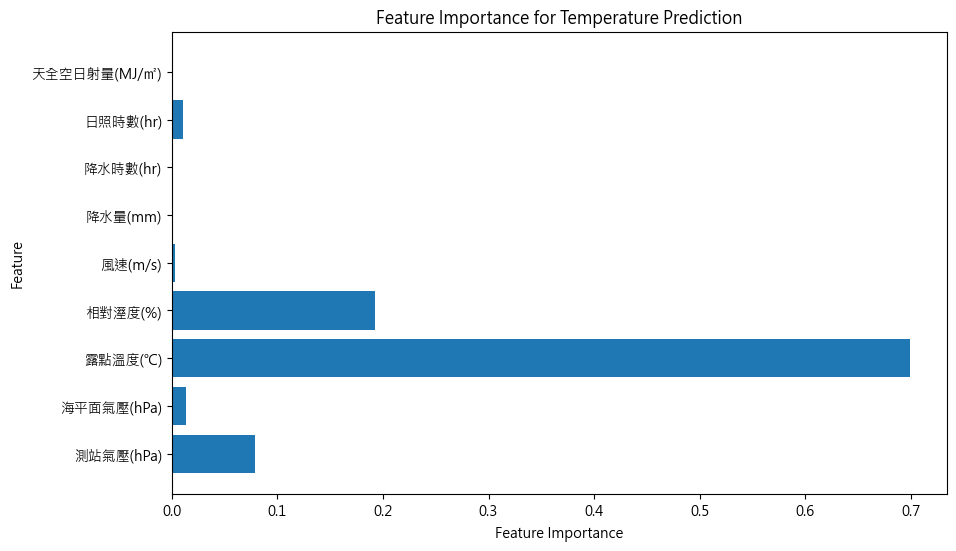

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

# 分開特徵和目標變量
X = input_data.drop(columns=["氣溫(℃)", "觀測時間(hour)"])  # 丟棄不需要的特徵
y = input_data["氣溫(℃)"]

# 切分 training dataset 和 validation dataset
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.3, random_state=42)

# 構建Random Forest模型
rf = RandomForestRegressor()

# 訓練模型
rf.fit(X_train, y_train)

# 獲取特徵重要性
feature_importances = rf.feature_importances_

# 印出所有特徵的重要性數值
for i, feature in enumerate(X.columns):
    print(f"{feature}: {feature_importances[i]}")

# 找出前五個特徵的索引
top5_indices = feature_importances.argsort()[::-1][:5]

# 印出前五個特徵
top5_features = X.columns[top5_indices]
print("Top 5 features:", top5_features)

# 繪製特徵重要性長條圖
plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei'] # 修改中文字體
plt.figure(figsize=(10, 6))
plt.barh(X.columns, feature_importances)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance for Temperature Prediction')
plt.show()